## Pacotes

In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns
import re

## TD-IDF
O 'Term Frequency — Inverse Document Frequency' tem o objetivo de calcular, estatisticamente, o peso de cada palavra, atribuindo assim, uma importância para cada palavra. 

Esses pesos podem ser utilizados posteriormente para: análise de sentimento, modelos de machine learning como 'Naive-Bayes', análises de similaridade, análise de clusters como K-means, entre outras aplicações.

## Conjunto de dados
Fonte COD: https://www.kaggle.com/datasets/beridzeg45/steam-reviews

In [6]:
dados_cod = pd.read_csv('https://raw.githubusercontent.com/jrodrigotico/TF-IDF-Reviews/main/reviews.csv')
dados_cod.columns = ['indice','jogo','data_lancamento','avaliacao_texto','avaliacao_nota','recomendavel','horas']


## Tratamento dos dados
### Retirada de pontuação
Será utilizado 'sub' do módulo 're'. A expressãoi regular utilizada, r'[^\w\s], corresponde a qualquer caracter que nao seja letra ou número. O ^ indica negação, '\w' indica qualquer caracter alfanumérico (letras e números), '\s' indica qualquer espaço em branco.

### Retirada de 'stopwords'
Será considerada as stopwords em Inglês e será utilizado: nltk.corpus.stopwords.words('english').

### Stemming
Redução das palavras para a forma 'raíz'. O stemming pode melhorar a precisçao da análise, por exemplo buscando palavras semelhantes e simplificando a análise do texto.

! Será criada um nova coluna ('avaliacao_new') que representa as avaliações ('avaliacao_texto') reduzidas (stemmizadas) e sem qualquer tipo de pontuação ou stopwords !

In [7]:
# Retirada pontuacao
def retirar_pontuacao(texto):
    return re.sub(r'[^\w\s]','', texto)

dados_cod['avaliacao_new'] = dados_cod['avaliacao_texto'].apply(func = retirar_pontuacao)

# Retirada de 'stopwords'
stopwords = set(nltk.corpus.stopwords.words('english'))
def retirar_stopwords(linha):
    palavra_limpa = [i for i in linha.split() if i.lower() not in stopwords] # aqui resulta em uma nova lista # [expressao for item in iterable if condicao]
    return ' '.join(palavra_limpa) # aqui as palavras sao separadas por espaço em branco

dados_cod['avaliacao_new'] = dados_cod['avaliacao_new'].apply(func = retirar_stopwords) 
# usar para validar:
# linha de index 2 , ver que o 'you' em 'avaliacao_texto' foi retirado na coluna 'avaliacao_new'
# linha de index 5 , ver que o 'the' em 'avaliacao_texto' foi retirado na coluna 'avaliacao_new'
# linha de index 8 , ver que o 'an' em 'avaliacao_texto' foi retirado na coluna 'avaliacao_new'



In [12]:
# Stemming
nltk.download('punkt')
stemmer = PorterStemmer()

def stemming(frase):
    palavra_token = word_tokenize(frase) # tokenização, ou seja, faz a quebra os caracteres
    palavra_stemming = [stemmer.stem(i) for i in palavra_token] # faz o stemming em cada palavra
    return ' '.join(palavra_stemming)

dados_cod['avaliacao_new'] = dados_cod['avaliacao_new'].apply(func = stemming)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JoãoPinheiro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Vetorização
Cada linha da tabela 'tfidf_tabela' representa uma avaliação e cada coluna representa uma palavra.

Aqui serão gerados os pesos de cada palavra em cada review.

In [ ]:
vetor = TfidfVectorizer()
tfidf = vetor.fit_transform(dados_cod['avaliacao_new'])
palavras = vetor.get_feature_names_out()
tfidf_tabela = pd.DataFrame(tfidf.toarray(), columns = palavras)
tfidf_tabela


## Palavras mais frequentes
São as palavras com maior peso.


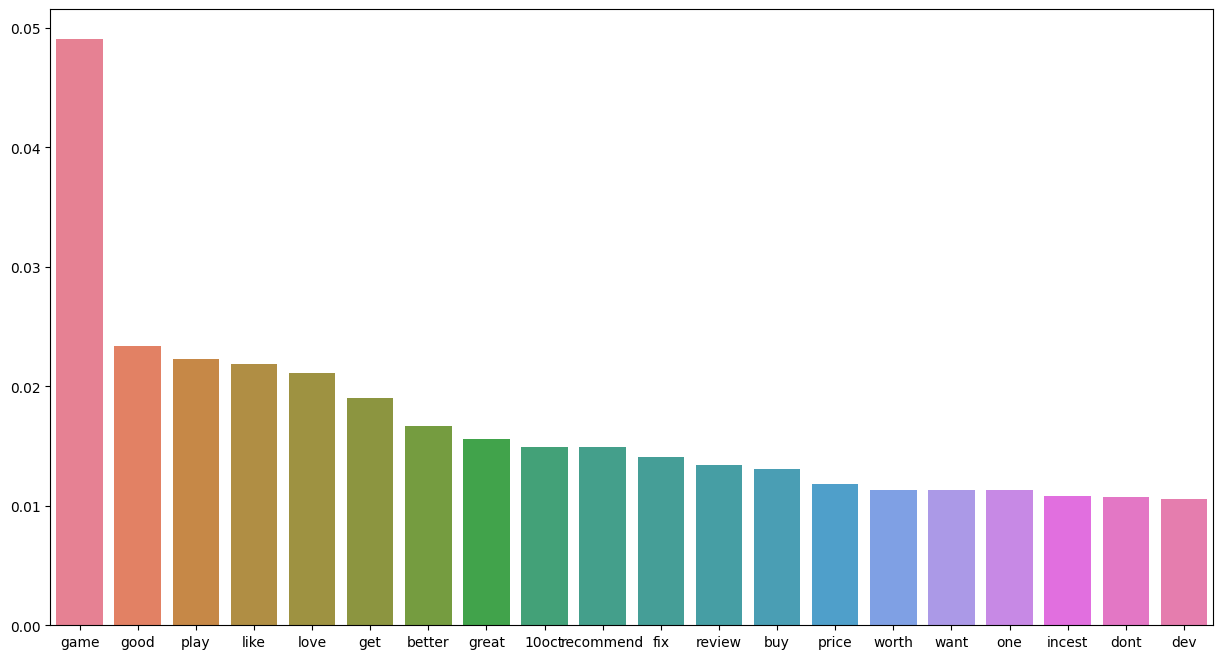

In [61]:
# Média de cada coluna e filtrando as 5 palavras com maior média dos pesos em cada review
mean = tfidf_tabela.mean(axis=0)

def mean_top (numero):
    mean_top = pd.DataFrame(round(mean.nlargest(numero),4), columns=['mean']).T
    return sns.barplot(data = mean_top).figure.set_size_inches(15,8)

# modificar número
mean_top(20)




